<center><h1><u> ΕΡΓΑΣΙΑ 2 - ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ </u></h1></center>
<center><h2> ΤΡΙΓΚΑΣ ΕΥΣΤΑΘΙΟΣ 1115201700167 </h2></center>
<center><h2> ΜΠΑΚΑΛΙΑΝΟΣ ΜΙΧΑΗΛ 1115201700269 </h2></center>

In [32]:
import sklearn
import pandas as pd
import glob
import os
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator # Wordcloud
from PIL import * # Image
import numpy as np
import matplotlib.pyplot as plt #plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


### Σε αυτό εδώ το κομμάτι , ξεκινάμε να φτιάχνουμε το dataframe με τα άρθρα 

In [45]:
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_colwidth', -1)
#'business','entertainment','politics',
categories = ['business','entertainment','politics' , 'tech']
df = pd.DataFrame()

path = 'data/'
# path = 'C:\\Users\\Stathis\\Desktop\\data_mining\\data\\'

titles = []
content = []
categorie = []

for c in categories:
    for i in os.listdir(path + c):
        if i.endswith('.txt'):
            dataFolder = path + c + "/" + i
            file = open(dataFolder)
            titles.append(file.readline()) #read title
            content.append(file.read()) #read content
            categorie.append(c) #add categorie

df['Titles'] = titles
df['Content'] = content
df['Categorie'] = categorie
df.insert(0, 'Id', range(0,len(df))) #add an id column 


df['Titles'] = df['Titles'].str.replace('\n','')
df['Content'] = df['Content'].str.replace('\n','')

df.head()

,Id,Titles,Content,Categorie
0,0,UK economy facing 'major risks',The UK manufacturing sector will continue to f...,business
1,1,Aids and climate top Davos agenda,Climate change and the fight against Aids are ...,business
2,2,Asian quake hits European shares,Shares in Europe's leading reinsurers and trav...,business
3,3,India power shares jump on debut,"Shares in India's largest power producer, Nati...",business
4,4,Lacroix label bought by US firm,Luxury goods group LVMH has sold its loss-maki...,business


### Εδώ προετοιμάζουμε τα αρχεία για να φτιάξουμε τα wordclouds ανα κατηγορία

In [46]:
def keep_cols(DataFrame, keep_these): #η συνάρτηση αυτη παρίνει όρισμα ένα Dataframe 
    drop_these = list(set(list(DataFrame)) - set(keep_these)) # και τις στήλες που θέλουμε να κρατήσουμε
    return DataFrame.drop(drop_these, axis = 1) # και επιστρέφει το αντίστοιχο Dataframe με τις συγκεκριμένες στήλες

#Making dataframes for each category.
business_df = df[df.Categorie == 'business'] #.pipe(keep_cols,['Content'])
entertainment_df = df[df.Categorie == 'entertainment'] # .pipe(keep_cols,['Content'])
politics_df = df[df.Categorie == 'politics'] #.pipe(keep_cols,['Content'])
# sport_df = df[df.Categorie == 'sport'].pipe(keep_cols,['Content'])
tech_df = df[df.Categorie == 'tech'] #.pipe(keep_cols,['Content'])



#### Δημιουργία WordCloud για την κατηγορία BUSINESS

<Figure size 432x288 with 0 Axes>

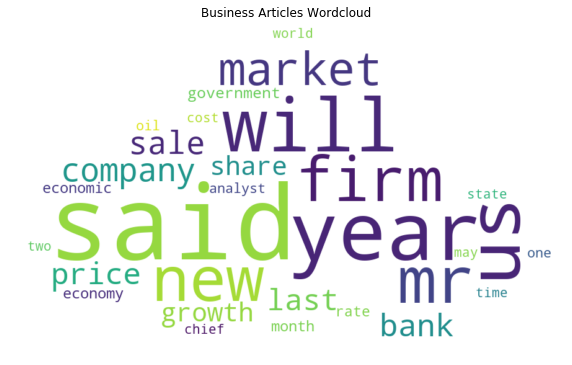

In [47]:
cloud_mask = np.array(Image.open( "cloud.jpg")) #the wordcloud shape

business_string =" ".join(business_df['Content'].str.lower())
business_wordcloud = WordCloud(mask=cloud_mask,stopwords=STOPWORDS,collocations=False,
                          background_color='white', 
                          max_words=30
                         ).generate(business_string)

plt.clf()
plt.figure (figsize =(10,10)) 
plt.imshow(business_wordcloud,interpolation="bilinear")

plt.title('Business Articles Wordcloud')
plt.axis('off')
plt.show()

 #### Δημιουργία WordCloud για την κατηγορία ENTERTAINMENT

<Figure size 432x288 with 0 Axes>

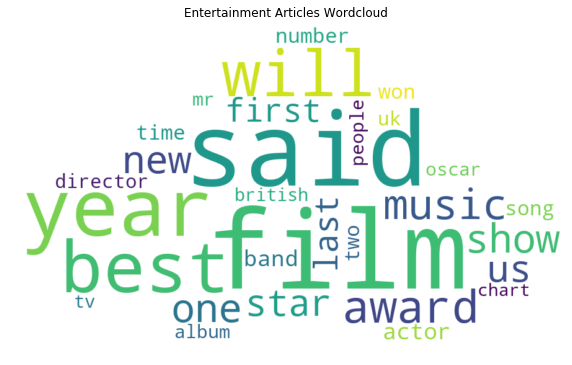

In [48]:
entertainment_string =" ".join(entertainment_df['Content'].str.lower())
entertainment_wordcloud = WordCloud(mask=cloud_mask,stopwords=STOPWORDS,collocations=False,
                          background_color='white', 
                          max_words=30
                         ).generate(entertainment_string)

plt.clf()
plt.figure (figsize =(10,10)) 
plt.imshow(entertainment_wordcloud,interpolation="bilinear")

plt.title('Entertainment Articles Wordcloud')
plt.axis('off')
plt.show()

#### Δημιουργία WordCloud για την κατηγορία POLITICS

<Figure size 432x288 with 0 Axes>

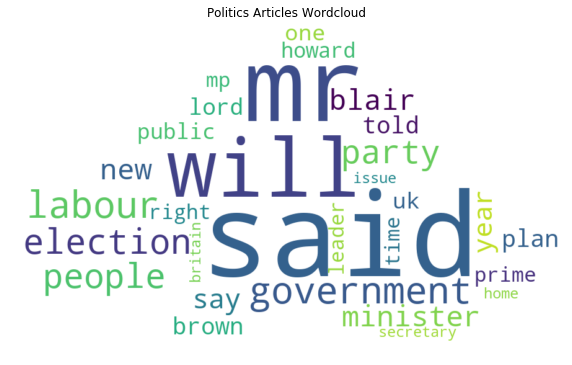

In [49]:
politics_string =" ".join(politics_df['Content'].str.lower())
politics_wordcloud = WordCloud(mask=cloud_mask,stopwords=STOPWORDS,collocations=False,
                          background_color='white', 
                          max_words=30
                         ).generate(politics_string)

plt.clf()
plt.figure (figsize =(10,10)) 
plt.imshow(politics_wordcloud,interpolation="bilinear")

plt.title('Politics Articles Wordcloud')
plt.axis('off')
plt.show()

#### Δημιουργία WordCloud για την κατηγορία TECH

<Figure size 432x288 with 0 Axes>

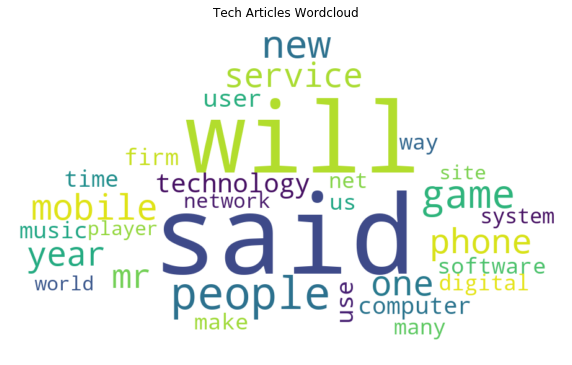

In [50]:
tech_string =" ".join(tech_df['Content'].str.lower())
tech_wordcloud = WordCloud(mask=cloud_mask,stopwords=STOPWORDS,collocations=False,
                          background_color='white', 
                          max_words=30
                         ).generate(tech_string)

plt.clf()
plt.figure (figsize =(10,10)) 
plt.imshow(tech_wordcloud,interpolation="bilinear")

plt.title('Tech Articles Wordcloud')
plt.axis('off')
plt.show()

#### Δημιουργία WordCloud για την κατηγορία SPORT

In [51]:
# sport_string =" ".join(tech_df['Content'].str.lower())
# sport_wordcloud = WordCloud(mask=cloud_mask,stopwords=STOPWORDS,collocations=False,
#                           background_color='white', 
#                           max_words=30
#                          ).generate(sport_string)

# plt.clf()
# plt.figure (figsize =(10,10)) 
# plt.imshow(sport_wordcloud,interpolation="bilinear")

# plt.title('Tech Articles Wordcloud')
# plt.axis('off')
# plt.show()

## Άσκηση 2

In [59]:
#split the dataframe into train(80%) and test
from sklearn.preprocessing import label_binarize
    
X = df.iloc[:,0:3] #category 
y = df.iloc[:,3]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

test = label_binarize(y_test, classes = ['business', 'politics', 'entertainment', 'tech'])

In [62]:
from sklearn import preprocessing

#create numeric categories using the LabelEncoder and fit-transorm pipeline
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [63]:
#create the count vectorizer and tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()

x_train_cv = count_vectorizer.fit_transform(x_train['Content'])
x_train_tf = tfidf.fit_transform(x_train['Content'])

x_test_cv =  count_vectorizer.transform(x_test['Content'])
x_test_tf = tfidf.transform(x_test['Content'])

<343x23657 sparse matrix of type '<class 'numpy.float64'>'
	with 68201 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def createPlot(classifier, X_test, test, opt):
    
    if(opt == 1):
        roc_predictions = classifier.predict_proba(X_test)
    else:
        roc_predictions = classifier.decision_function(X_test)
    
    n_classes = 4
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test[:, i], roc_predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test.ravel(), roc_predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [58]:
#SVM 
from sklearn.svm import SVC
model = sklearn.svm.SVC()
from sklearn.model_selection import train_test_split, cross_val_score

#kernel='rbf',C='30',gamma='auto'

#vectorizer
model.fit(x_train_cv,y_train)
scores = cross_val_score(model, x_train_cv,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model, x_train_cv, y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, x_train_cv, y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,x_train_cv, y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)



0.9154025177192425 [0.89855072 0.94890511 0.90510949 0.94160584 0.90510949 0.89051095
 0.91240876 0.91240876 0.91240876 0.9270073 ]
Precision 0.9154025177192425 [0.89855072 0.94890511 0.90510949 0.94160584 0.90510949 0.89051095
 0.91240876 0.91240876 0.91240876 0.9270073 ]
Recalls 0.9154025177192425 [0.89855072 0.94890511 0.90510949 0.94160584 0.90510949 0.89051095
 0.91240876 0.91240876 0.91240876 0.9270073 ]
F1 0.9154025177192425 [0.89855072 0.94890511 0.90510949 0.94160584 0.90510949 0.89051095
 0.91240876 0.91240876 0.91240876 0.9270073 ]


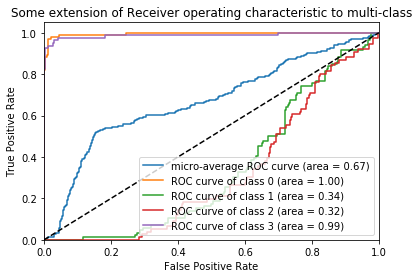

In [17]:
from sklearn import metrics


createPlot(model, x_test_cv, test, 0)

In [18]:
#tfidf
model.fit(x_train_tf,y_train)
scores = cross_val_score(model, x_train_tf,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model, x_train_tf, y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, x_train_tf, y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,x_train_tf, y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)

0.9649846609541944 [0.97101449 0.97080292 0.94890511 0.97810219 0.96350365 0.94890511
 0.95620438 0.95620438 0.97080292 0.98540146]
Precision 0.9649846609541944 [0.97101449 0.97080292 0.94890511 0.97810219 0.96350365 0.94890511
 0.95620438 0.95620438 0.97080292 0.98540146]
Recalls 0.9649846609541944 [0.97101449 0.97080292 0.94890511 0.97810219 0.96350365 0.94890511
 0.95620438 0.95620438 0.97080292 0.98540146]
F1 0.9649846609541944 [0.97101449 0.97080292 0.94890511 0.97810219 0.96350365 0.94890511
 0.95620438 0.95620438 0.97080292 0.98540146]


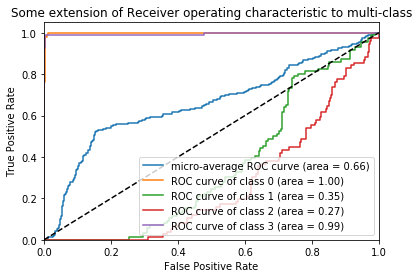

In [19]:
createPlot(model, x_test_tf, test, 0)

In [20]:
# predictions of test for SVM

predictions = model.predict(x_test_cv)
predictions = model.predict(x_test_tf)

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)

#vectorizer
model.fit(x_train_cv,y_train)
scores = cross_val_score(model, x_train_cv,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model, x_train_cv, y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, x_train_cv, y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,x_train_cv, y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)


#tfidf
model.fit(x_train_tf,y_train)
scores = cross_val_score(model, x_train_tf,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model, x_train_tf, y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, x_train_tf, y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,x_train_tf, y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)

0.654257907542579 [0.66666667 0.6350365  0.64963504 0.66423358 0.61313869 0.62773723
 0.67153285 0.65693431 0.67883212 0.67883212]
Precision 0.654257907542579 [0.66666667 0.6350365  0.64963504 0.66423358 0.61313869 0.62773723
 0.67153285 0.65693431 0.67883212 0.67883212]
Recalls 0.654257907542579 [0.66666667 0.6350365  0.64963504 0.66423358 0.61313869 0.62773723
 0.67153285 0.65693431 0.67883212 0.67883212]
F1 0.654257907542579 [0.66666667 0.6350365  0.64963504 0.66423358 0.61313869 0.62773723
 0.67153285 0.65693431 0.67883212 0.67883212]
0.6615307309848725 [0.70289855 0.64233577 0.60583942 0.66423358 0.64233577 0.60583942
 0.71532847 0.64963504 0.7080292  0.67883212]
Precision 0.6615307309848725 [0.70289855 0.64233577 0.60583942 0.66423358 0.64233577 0.60583942
 0.71532847 0.64963504 0.7080292  0.67883212]
Recalls 0.6615307309848725 [0.70289855 0.64233577 0.60583942 0.66423358 0.64233577 0.60583942
 0.71532847 0.64963504 0.7080292  0.67883212]
F1 0.6615307309848725 [0.70289855 0.64233

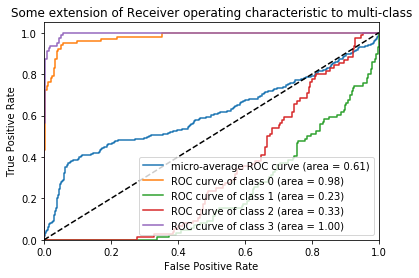

In [22]:
createPlot(model, x_test_cv, test, 1)

In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

temp_cv = x_train_cv.toarray()
temp_tf = x_train_cv.toarray()

#vectorizer
model.fit(temp_cv ,y_train)
scores = cross_val_score(model, temp_cv ,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model,temp_cv , y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, temp_cv , y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,temp_cv , y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)


#tfidf
model.fit(temp_tf,y_train)
scores = cross_val_score(model,temp_tf,y_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(model, temp_tf, y_train, cv=10, scoring='precision_micro')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(model, temp_tf, y_train, cv=10, scoring='recall_micro')
print ('Recalls', np.mean(recalls), recalls)
f1s = cross_val_score(model,temp_tf, y_train, cv=10, scoring='f1_micro')
print ('F1', np.mean(f1s), f1s)

0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
Precision 0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
Recalls 0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
F1 0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
Precision 0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
Recalls 0.9153972283931028 [0.9057971  0.9270073  0.93430657 0.93430657 0.94160584 0.95620438
 0.86861314 0.87591241 0.89051095 0.91970803]
F1 0.9153972283931028 [0.9057971  0.9

In [69]:
from math import sqrt
import heapq
from operator import itemgetter

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

#return most frequent element in a list
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 


predictions = []
k=5

x_train_cv_array = x_train_cv.toarray()
x_test_cv_array = x_test_cv.toarray()



for i in range(len(x_test_cv_array)):
    v1 = x_test_cv_array[i]
    distances = []
    for v2 in x_train_cv_array:
        distances.append(euclidean_distance(v1,v2))
    i_val = heapq.nsmallest(k, enumerate(distances), key=itemgetter(1))

    temp_prediction_list = []

    for x in i_val:
        temp_prediction_list.append(y_train[x[0]])

    predictions.append(most_frequent(temp_prediction_list)) 


In [75]:
count = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        count = count+1

print("K-means prediction accuracy = "  )
print(count/len(predictions))

K-means prediction accuracy = 
0.7871720116618076


## 3. Beat the Benchmark (bonus)

In [64]:
#I will use svm model with most efficient parameters and tfidf with a good cleaning of the data 
import string
from nltk.corpus import stopwords
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words


x_train_t = TfidfVectorizer(analyzer=process_text).fit_transform(x_train['Content'])

In [76]:
#I will use svm model with most efficient parameters and tfidf with a good cleaning of the data 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]}

model = GridSearchCV(sklearn.svm.SVC(),tuned_parameters)

model.fit(x_train_tf,y_train)
print("Better SVM is : ")
print(model.score(x_test_tf,y_test))


Better SVM is : 
0.9766763848396501


## Ασκηση 4


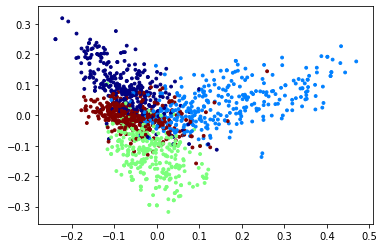

In [66]:
#tf_idf pca transform
from sklearn.decomposition import PCA
# from sklearn import preprocessing
X_Norm = preprocessing.normalize(x_train_tf)
pca = PCA(n_components=2)


reduced_vecs = pca.fit_transform(X_Norm.toarray())
reduced_vecs = np.array(reduced_vecs)

fig, ax = plt.subplots()

cm = plt.get_cmap('jet', 5)
colors = [cm(i/5) for i in range(5)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in y_train ], cmap='jet', s=8)

plt.show()


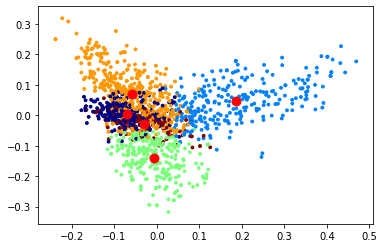

In [67]:
#tf idf clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(X_Norm)
c_labels = kmeans.labels_
centers2D = pca.transform(kmeans.cluster_centers_)
fig, ax = plt.subplots()

cm = plt.get_cmap('jet', 5)
colors = [cm(i/5) for i in range(5)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in c_labels], cmap='jet', s=8)
ax.scatter(centers2D[:,0], centers2D[:,1], c='r',marker = 'o' , s = 80)


plt.show()

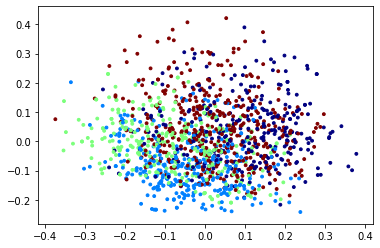

In [27]:
#count vectorized pca transform
X_Norm = preprocessing.normalize(x_train_cv)
pca = PCA(n_components=2)

X_Norm = X_Norm.toarray()
reduced_vecs = pca.fit_transform(X_Norm)
reduced_vecs = np.array(reduced_vecs)

fig, ax = plt.subplots()

cm = plt.get_cmap('jet', 5)
colors = [cm(i/5) for i in range(5)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in y_train ], cmap='jet', s=8)

plt.show()

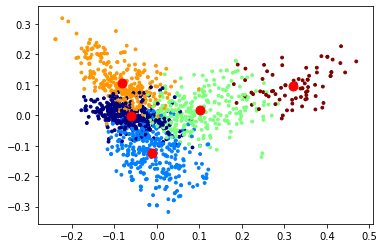

In [68]:
#count vectorizer clustering
kmeans = KMeans(n_clusters=5).fit(X_Norm)
c_labels = kmeans.labels_
centers2D = pca.transform(kmeans.cluster_centers_)
fig, ax = plt.subplots()

cm = plt.get_cmap('jet', 5)
colors = [cm(i/5) for i in range(5)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in c_labels], cmap='jet', s=8)
ax.scatter(centers2D[:,0], centers2D[:,1], c='r',marker = 'o' , s = 80)


plt.show()
